<figure><IMG SRC="https://www.bluemetrica.com/wp-content/uploads/2017/09/bluemetrica_vector_small.svg
" WIDTH=325 ALIGN="right">
</figure>
    
# Decision tree    

In [1]:

import numpy as np      
import pandas as pd        
import matplotlib.pyplot as plt 
import seaborn as sns 

### Import and preprocess data

In [2]:
# %load "g:My Drive/diamonds_preproc.py"
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("D:/01. W 2023 2024/Data Mining/Data_Mining/Data_Mining/Trees, ensembles Neural Networks/diamonds.csv")
df.drop(columns= "Unnamed: 0",inplace = True)

In [6]:
display(df)
df.cut.value_counts()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [7]:
pd.get_dummies(df.cut)

,Fair,Good,Ideal,Premium,Very Good
0,False,False,True,False,False
1,False,False,False,True,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,True,False,False,False
...,...,...,...,...,...
53935,False,False,True,False,False
53936,False,True,False,False,False
53937,False,False,False,False,True
53938,False,False,False,True,False


In [8]:
# Train/test split

from sklearn.model_selection import train_test_split
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. select labels of features for one hot encoding and standarization
num_labels = X_train.select_dtypes("number").columns
cat_labels = X_train.select_dtypes("object").columns

In [11]:
# 2. define preprocessor for each type of data
cat_preprocessor = OneHotEncoder(drop = "if_binary")
num_preprocessor = FunctionTransformer()

# 3. Combine it all together
preprocessor = ColumnTransformer([("cat", cat_preprocessor, cat_labels),
                                 ("num", num_preprocessor, num_labels)])

In [12]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                 Index(['cut', 'color', 'clarity'], dtype='object')),
                                ('num', FunctionTransformer(),
                                 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])

In [14]:
# Relevant to construct labels for all features
preprocessor.fit(X_train)

feature_labels = preprocessor.transformers_[0][1].get_feature_names_out(cat_labels).tolist()
feature_labels.extend(num_labels)

from sklearn.metrics import mean_squared_error

#Train/test split

from sklearn.model_selection import train_test_split

In [15]:
feature_labels

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'carat',
 'depth',
 'table',
 'x',
 'y',
 'z']

### Regression trees

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dt = DecisionTreeRegressor()

dt_pipe = Pipeline([
    ("preproc", preprocessor),
    ("tree", dt)
])
dt_pipe
dt_pipe.fit(X_train,y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['cut', 'color', 'clarity'], dtype='object')),
                                                 ('num', FunctionTransformer(),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])),
                ('tree', DecisionTreeRegressor())])

In [18]:
y_train_pred = dt_pipe.predict(X_train)
mean_squared_error(y_train,y_train_pred,squared=False)

9.084389916539722

In [19]:
y_test_pred = dt_pipe.predict(X_test)
mean_squared_error(y_test,y_test_pred,squared=False)

750.0955562761969

In [20]:
dt.get_depth() # 36 depth of decision tree --> Huge Decision Tree.

36

#### Summary 
* overfitted model


### Tree visualization

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(dt,"tree.dot",feature_names=feature_labels)


!pip install graphviz

In [43]:
!dot -Tpng tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0796969 to fit


In [22]:
y_train.mean()

3951.495312251708

### Tuning

In [23]:
import os
os.cpu_count()

12

In [24]:
# Use of Pipeling prevents overfitting during cross validation
from sklearn.model_selection import GridSearchCV, KFold

dt = DecisionTreeRegressor(random_state=42)

dt_pipe = Pipeline([
    ("preproc", preprocessor),
    ("tree", dt)
])

hyper_params = {"tree__max_depth": np.arange(6,18)}

kfold = KFold(n_splits=5,
             shuffle=True,
             random_state=42)

grid = GridSearchCV(estimator=dt_pipe,
                   param_grid=hyper_params,
                    scoring = "neg_mean_squared_error",
                    cv = kfold,
                    n_jobs = 2)

grid.fit(X_train,y_train)                    


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         Index(['cut', 'color', 'clarity'], dtype='object')),
                                                                        ('num',
                                                                         FunctionTransformer(),
                                                                         Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])),
                                       ('tree',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=2,
             param_grid={'tree__max_depth': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])},
             scoring='neg_mean_squared_error')

In [25]:
grid.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['cut', 'color', 'clarity'], dtype='object')),
                                                 ('num', FunctionTransformer(),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=13, random_state=42))])

In [26]:
grid.best_params_

{'tree__max_depth': 13}

In [27]:
y_train_pred = grid.predict(X_train)
mean_squared_error(y_train,y_train_pred,squared=False)

466.1329532344556

In [28]:
y_test_pred = grid.predict(X_test)
mean_squared_error(y_test,y_test_pred,squared=False)

662.1831583404137

In [39]:
import xgboost

xgb = xgboost.XGBRegressor(random_state = 42)
xgb_pipe = Pipeline([
    ("prepoc", preprocessor),
    ("tree",xgb)
])

In [40]:
xgb_pipe.fit(X_train, y_train)
y_train_pred = xgb_pipe.predict(X_train)
mean_squared_error(y_train,y_train_pred,squared=False)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


392.7886809543145

In [41]:
y_test_pred = xgb_pipe.predict(X_test)
mean_squared_error(y_test,y_test_pred,squared=False)

558.2916875550834

#### Summary
* dealing with model overfitting reduces test error even further

### Feature importance

In [29]:
dt_tuned = grid.best_estimator_[-1]
importances = dt_tuned.feature_importances_


In [30]:
df_importance = pd.DataFrame(importances, columns= ["importance"])
df_importance["features"] = feature_labels
df_importance.sort_values("importance", ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='features'>

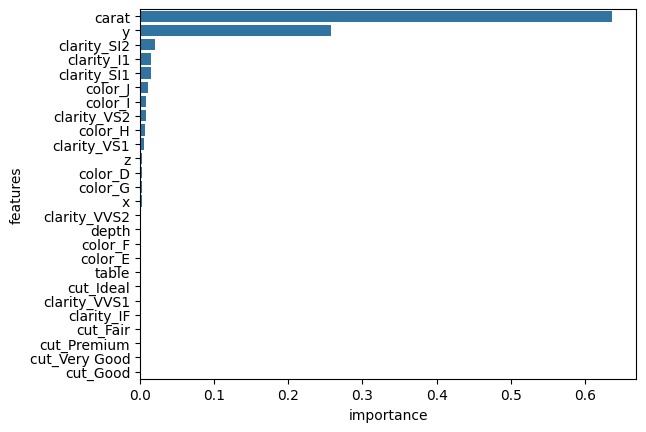

In [31]:
sns.barplot(x = "importance", y= "features", data = df_importance)

In [32]:
X_train.corr(method="spearman")

ValueError: could not convert string to float: 'Ideal'

### Permutation Feature importance

In [33]:
from sklearn.inspection import permutation_importance


X_test_transformed = grid.best_estimator_[0].transform(X_test)

In [34]:
perm_imp = permutation_importance(grid.best_estimator_[-1],
                                  X_test_transformed,
                                  y_test,
                                  scoring ="neg_mean_squared_error",
                                  n_repeats=20,
                                  random_state=42)

In [35]:
perm_imp['importances_mean']

array([-5.76702084e+02, -1.52600886e+02,  2.54654778e+04, -9.03821739e+02,
       -5.64315811e+02,  1.41283165e+05,  6.61686798e+04,  5.79097117e+04,
        1.14117860e+05,  2.52676340e+05,  4.61162808e+05,  6.28502837e+05,
        6.39323170e+05,  1.61957563e+04,  1.78214713e+06,  3.11965275e+06,
        2.55243929e+05,  5.93822638e+05,  1.81455178e+04,  8.12237747e+04,
        2.49632002e+07,  1.35159297e+04,  2.08164664e+03,  1.78300658e+06,
        4.69768601e+06,  2.68247776e+05])

In [36]:
df_importance = pd.DataFrame(perm_imp['importances_mean'], columns= ["importance"])
df_importance["features"] = feature_labels
df_importance.sort_values("importance", ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='features'>

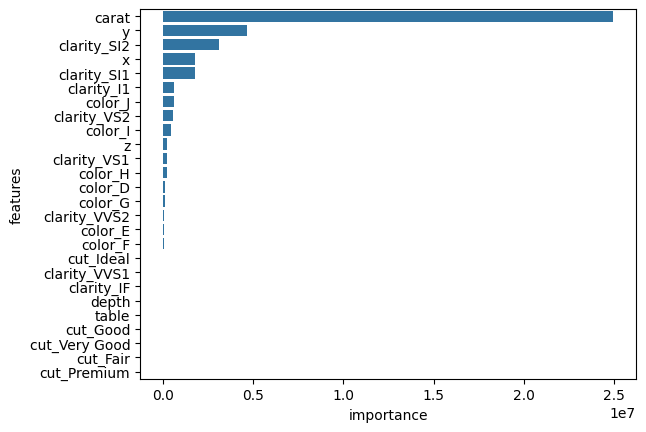

In [37]:
sns.barplot(x = "importance", y= "features", data = df_importance)